Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [2]:
df=pd.read_csv("Bank_cleaned.csv")
df.head()

,Unnamed: 0,age,default,housing,loan,balance_log,campaign_log,pdays_missing,previous_log,day_sin,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,y
0,0,42,0,0,0,2.079442,1.386294,1,0.0,-0.785650,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
1,1,38,0,0,0,6.244167,0.693147,1,0.0,0.247022,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,2,36,0,1,0,6.401917,1.098612,1,0.0,0.741222,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,3,27,0,1,0,3.555348,1.098612,1,0.0,0.559589,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
4,4,26,0,1,0,6.791221,0.693147,1,0.0,0.538005,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


In [3]:
df_clean=df.dropna()

In [4]:
X=df_clean.drop(columns='y')
y=df_clean['y']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,shuffle=True,random_state=100)

In [5]:
X_train.head()

,Unnamed: 0,age,default,housing,loan,balance_log,campaign_log,pdays_missing,previous_log,day_sin,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
33904,33904,36,0,0,1,1.609438,0.693147,1,0.0,-0.729558,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
365630,365630,39,0,1,0,6.161207,1.791759,1,0.0,-0.263665,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
657159,657159,35,0,0,0,7.261225,1.609438,1,0.0,-0.615285,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
626967,626967,44,0,1,0,0.000000,1.609438,1,0.0,0.587785,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
175019,175019,55,0,0,0,6.779922,0.693147,1,0.0,0.463550,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [6]:
y_train.head()

,y
33904,0
365630,0
657159,0
626967,0
175019,0


In [7]:
X_test.head(5)

,Unnamed: 0,age,default,housing,loan,balance_log,campaign_log,pdays_missing,previous_log,day_sin,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
3360,3360,35,0,0,1,0.000000,0.693147,1,0.0,-0.025818,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
363527,363527,54,0,0,0,6.322565,1.386294,1,0.0,-0.806480,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
420897,420897,33,0,1,0,6.428105,0.693147,1,0.0,0.963471,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
605534,605534,29,0,1,0,0.000000,1.386294,1,0.0,0.729558,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
516014,516014,31,0,1,1,0.000000,1.098612,1,0.0,-0.440519,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [8]:
y_test.head(5)

,y
3360,0
363527,0
420897,0
605534,0
516014,0


Importing models

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [10]:
# Logistic Regression
lg_reg=LogisticRegression(max_iter=1000,class_weight='balanced')
lg_reg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [11]:
# Random Forest
rf=RandomForestClassifier(n_estimators=200,random_state=100,class_weight='balanced')
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=100)

In [12]:
# XGBoost
xgb=XGBClassifier(eval_metric='logloss',scale_pos_weight=(y_train.value_counts()[0]/y_train.value_counts()[1]))
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [15]:
def evaluate_models(name,model,X_test,y_test):
  y_pred=model.predict(X_test)
  y_prob=model.predict_proba(X_test)[:,1] if hasattr(model,"predict_proba") else None

  acc=accuracy_score(y_test,y_pred)
  prec=precision_score(y_test,y_pred)
  rec=recall_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred)
  auc=roc_auc_score(y_test,y_prob) if y_prob is not None else None

  return {
      "Model":name,
      "Accuracy": round(acc,2),
      "Precision":round(prec,2),
      "Recall": round(rec,2),
      "F1":round(f1,2),
      "ROC-AUC": round(auc,2) if auc else "N/A"
  }

results=[]
results.append(evaluate_models("Logistic Regression",lg_reg,X_test,y_test))
results.append(evaluate_models("Random Forest",rf,X_test,y_test))
results.append(evaluate_models("XGBoost",xgb,X_test,y_test))

compare_models=pd.DataFrame(results)
print(compare_models)

                 Model  Accuracy  Precision  Recall    F1  ROC-AUC
0  Logistic Regression      0.70       0.25    0.74  0.37     0.79
1        Random Forest      0.89       0.63    0.27  0.38     0.82
2              XGBoost      0.79       0.33    0.73  0.46     0.85


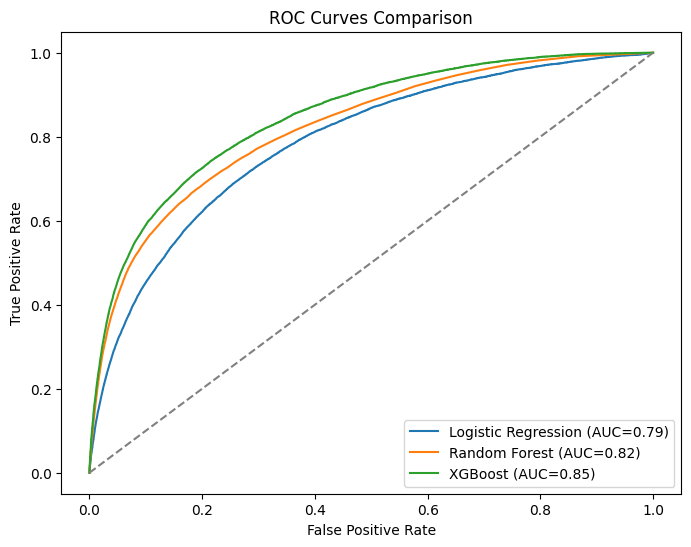

In [17]:
from sklearn.metrics import roc_curve, auc
models = {
    "Logistic Regression": lg_reg,
    "Random Forest": rf,
    "XGBoost": xgb
}

plt.figure(figsize=(8,6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

plt.plot([0,1],[0,1],'--',color='gray')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()